# Author : Ghada Kamel El-Monayer

# Email: ghadakamel92@gmail.com

##  #Task3 for Spark Foundation Internship For Data Science

In [2]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### load and read data

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'latin')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
#data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
#Renaming columns names

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [7]:
#select important columns

In [8]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','Group','Targettype','Weapon']]

In [9]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,Group,Targettype,Weapon
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [10]:
#data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  Group       181691 non-null  object 
 14  Targettype  181691 non-null  object 
 15  Weapon      181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [11]:
#check null data
df.isna().sum()

Year              0
Month             0
day               0
Country           0
State           421
Region            0
City            434
latitude       4556
longitude      4557
Attacktype        0
kill          10313
Wound         16311
target1         636
Group             0
Targettype        0
Weapon            0
dtype: int64

In [14]:
#decribe data and statastics 
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## Data preprocessing


In [15]:
#Fill null values

df['kill'].fillna(df['kill'].mean(),inplace=True)
df['Wound'].fillna(df['Wound'].mean(),inplace=True)

In [16]:
#change datatype as can't be float it should be integer
df['kill'] = df['kill'].astype('int64')
df['Wound'] = df['Wound'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        181691 non-null  int64  
 11  Wound       181691 non-null  int64  
 12  target1     181055 non-null  object 
 13  Group       181691 non-null  object 
 14  Targettype  181691 non-null  object 
 15  Weapon      181691 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 22.2+ MB


## Data Visualization

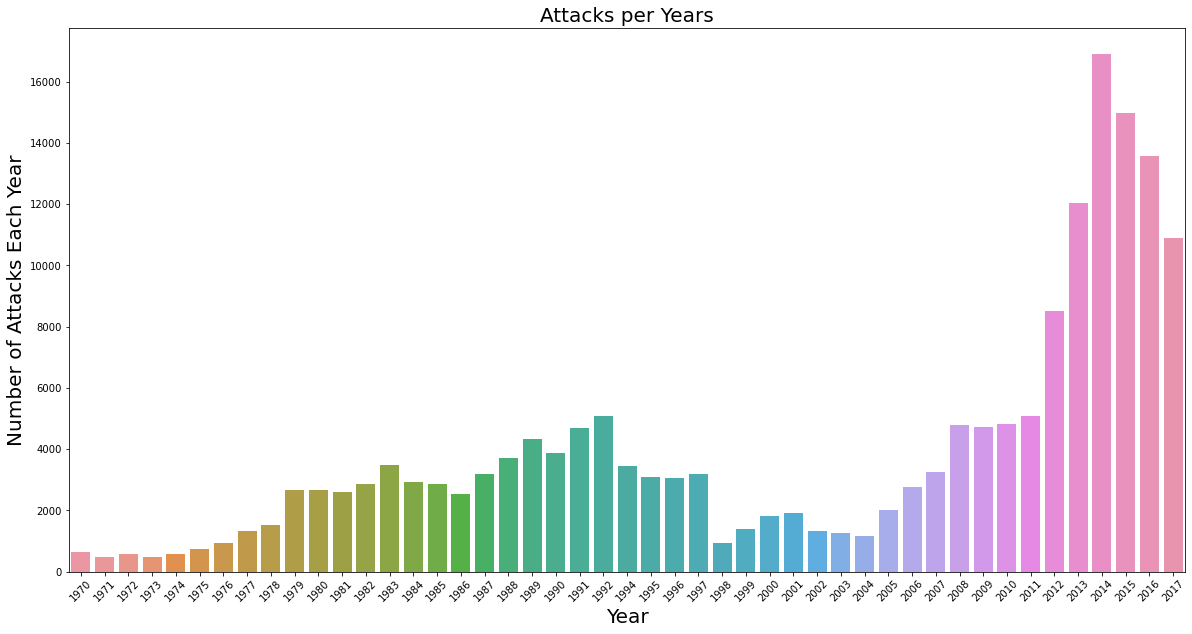

In [20]:
year = df['Year'].unique()
year_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = year,
           y = year_count)

plt.xticks(rotation = 45)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks per Years',fontsize=20)
plt.show()

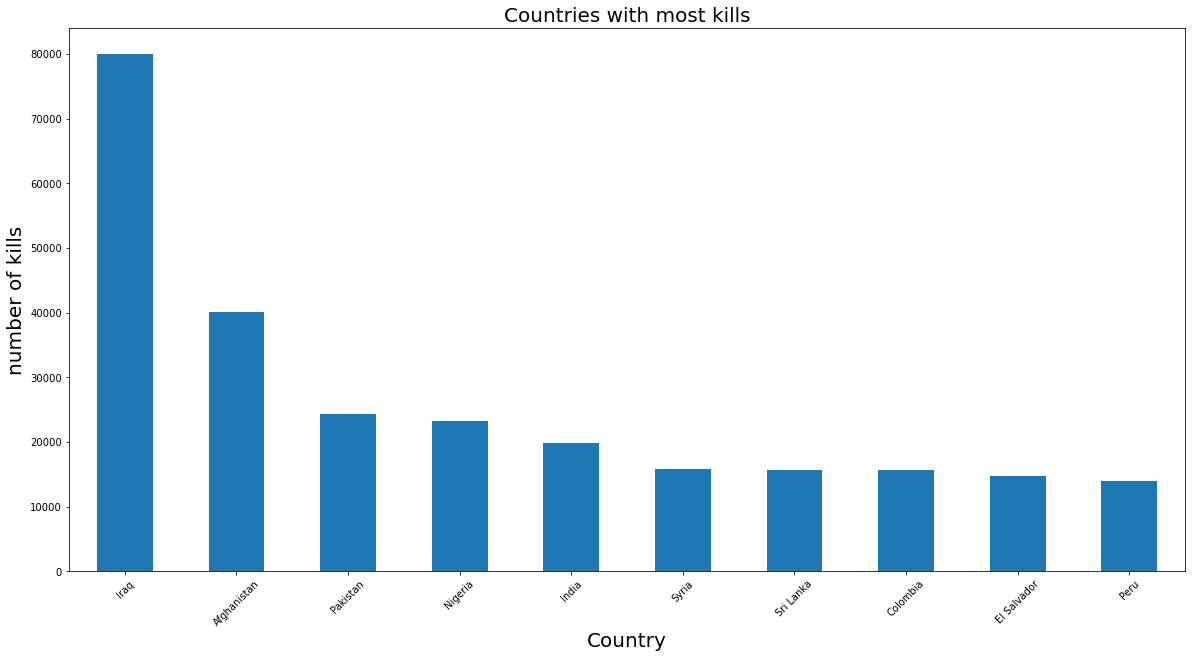

In [21]:
plt.figure(figsize=(20,10))
plt.title("Countries with most kills",fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('number of kills',fontsize=20)
df.groupby('Country').sum()['kill'].sort_values(ascending=False).head(10).plot(kind ='bar')
plt.xticks(rotation = 45)
plt.show()

In [22]:
attack = df.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

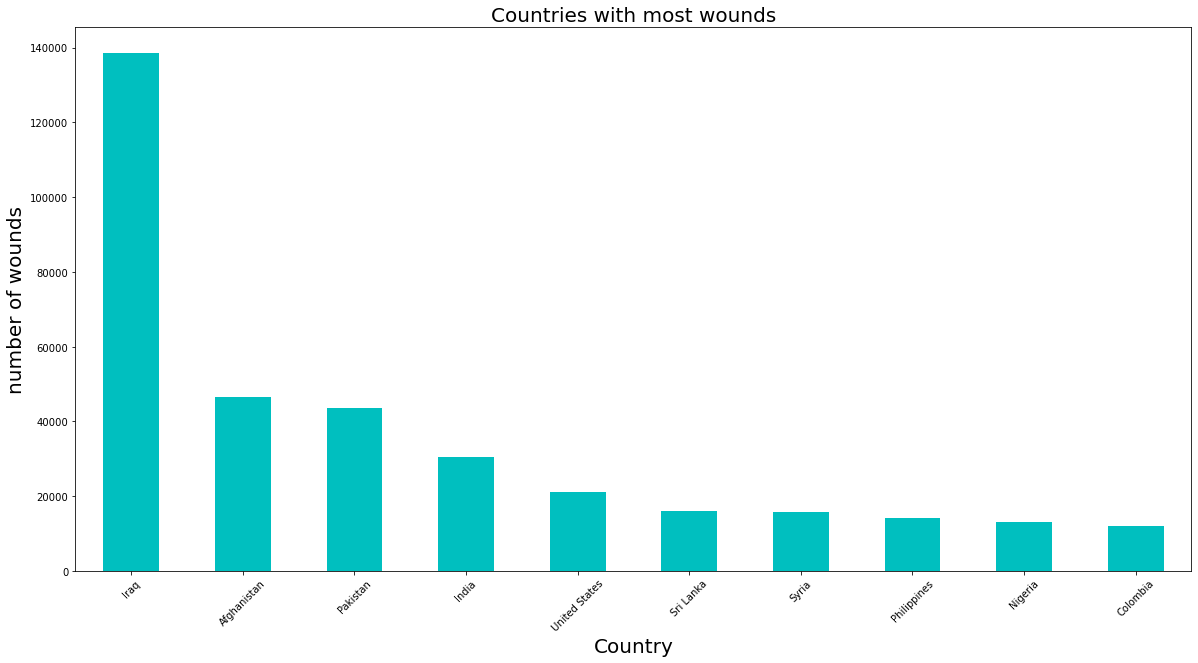

In [27]:
plt.figure(figsize=(20,10))
plt.title("Countries with most wounds", fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('number of wounds', fontsize=20)
df.groupby('Country').sum()['Wound'].sort_values(ascending=False).head(10).plot(kind ='bar', color='c')
plt.xticks(rotation = 45)
plt.show()

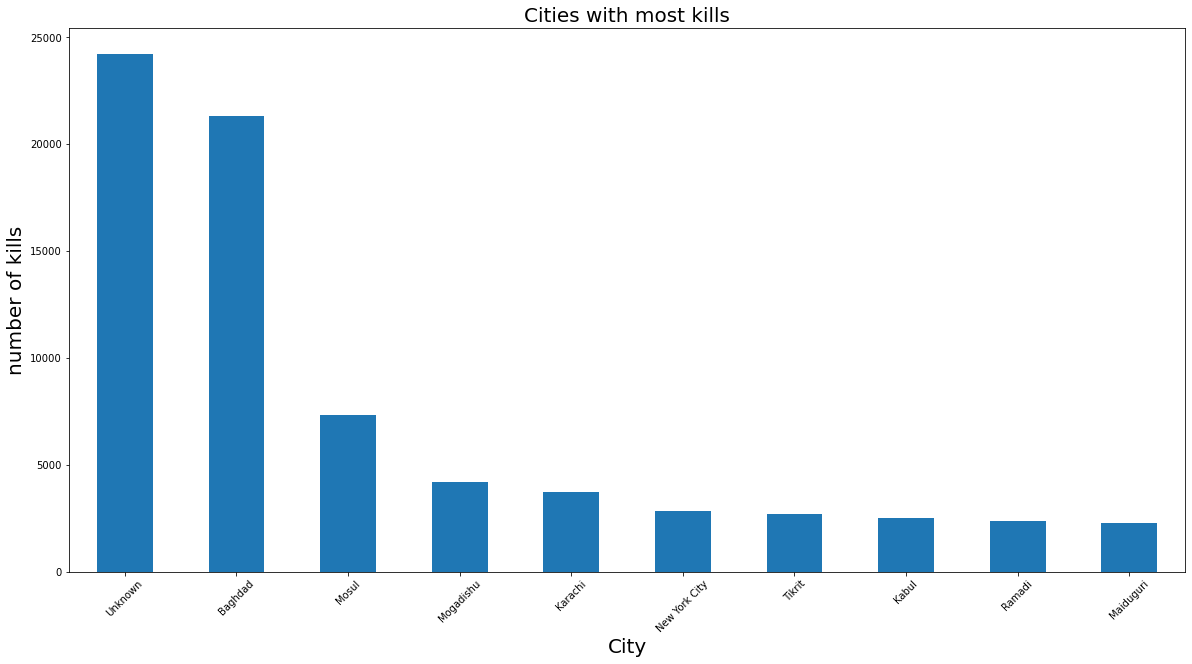

In [28]:
plt.figure(figsize=(20,10))
plt.title("Cities with most kills",fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('number of kills',fontsize=20)
df.groupby('City').sum()['kill'].sort_values(ascending=False).head(10).plot(kind ='bar')
plt.xticks(rotation = 45)
plt.show()

In [29]:
attack1 = df.City.value_counts()[:10]
attack1

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

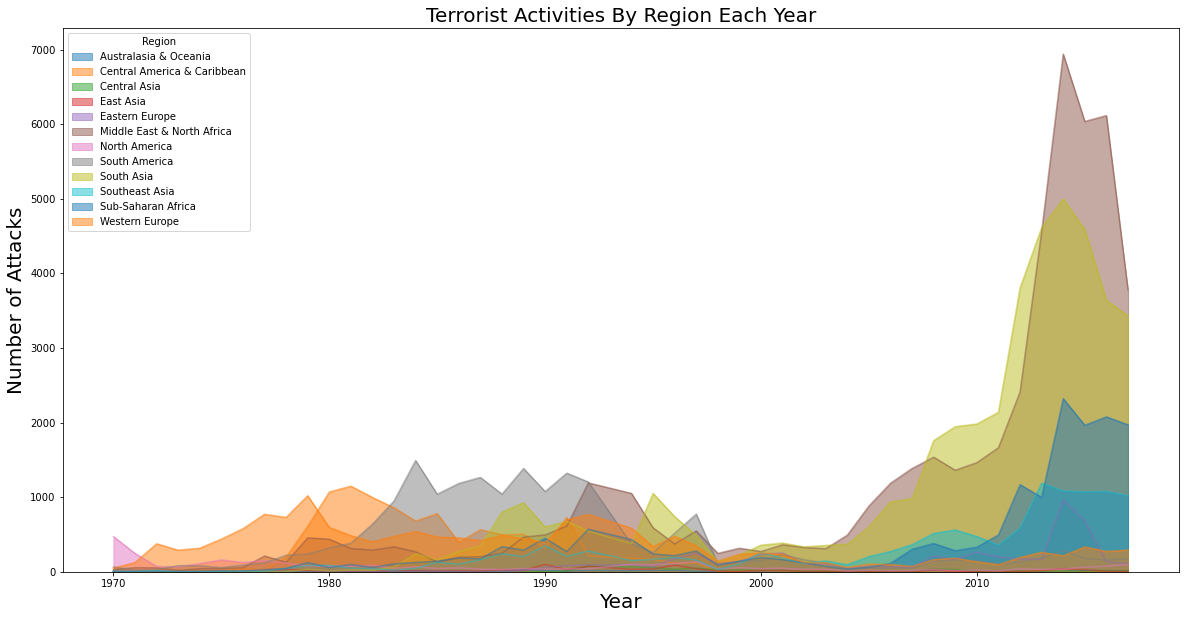

In [30]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

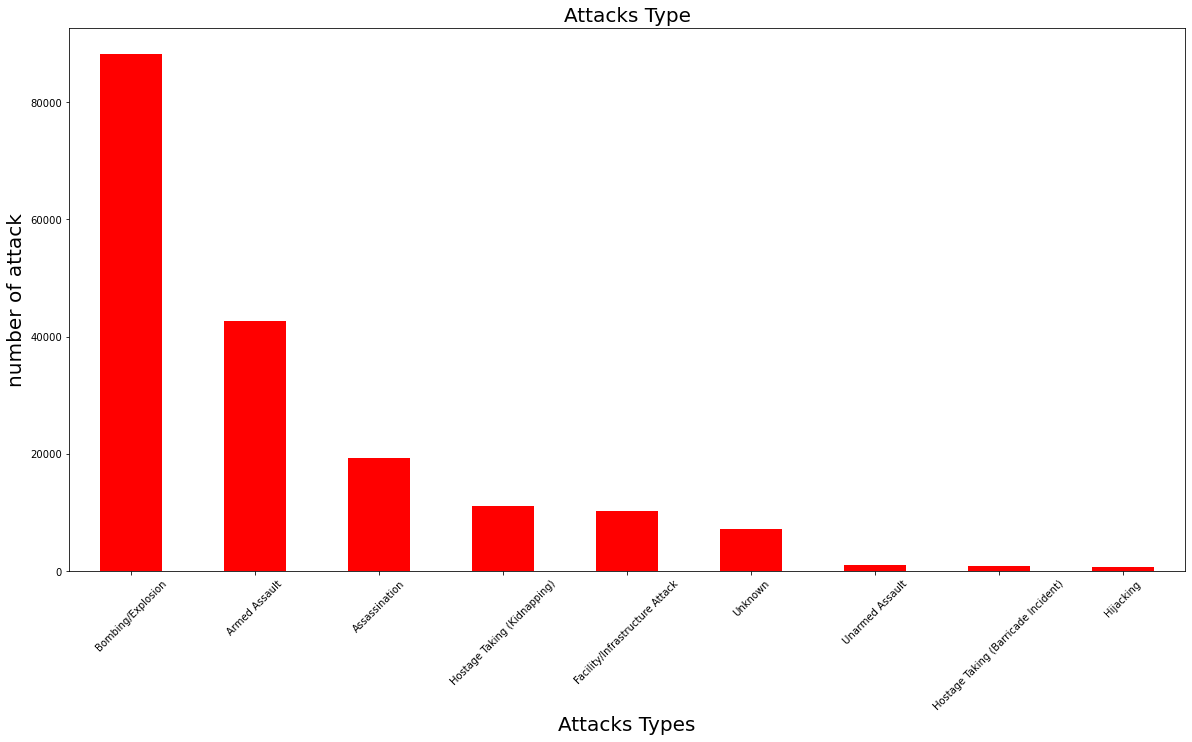

In [32]:
plt.figure(figsize=(20,10))
plt.title("Attacks Type",fontsize=20)
plt.xlabel('Attacks Types',fontsize=20)
plt.ylabel('number of attack',fontsize=20)
df['Attacktype'].value_counts().plot(kind='bar',color='r')
plt.xticks(rotation = 45)
plt.show()

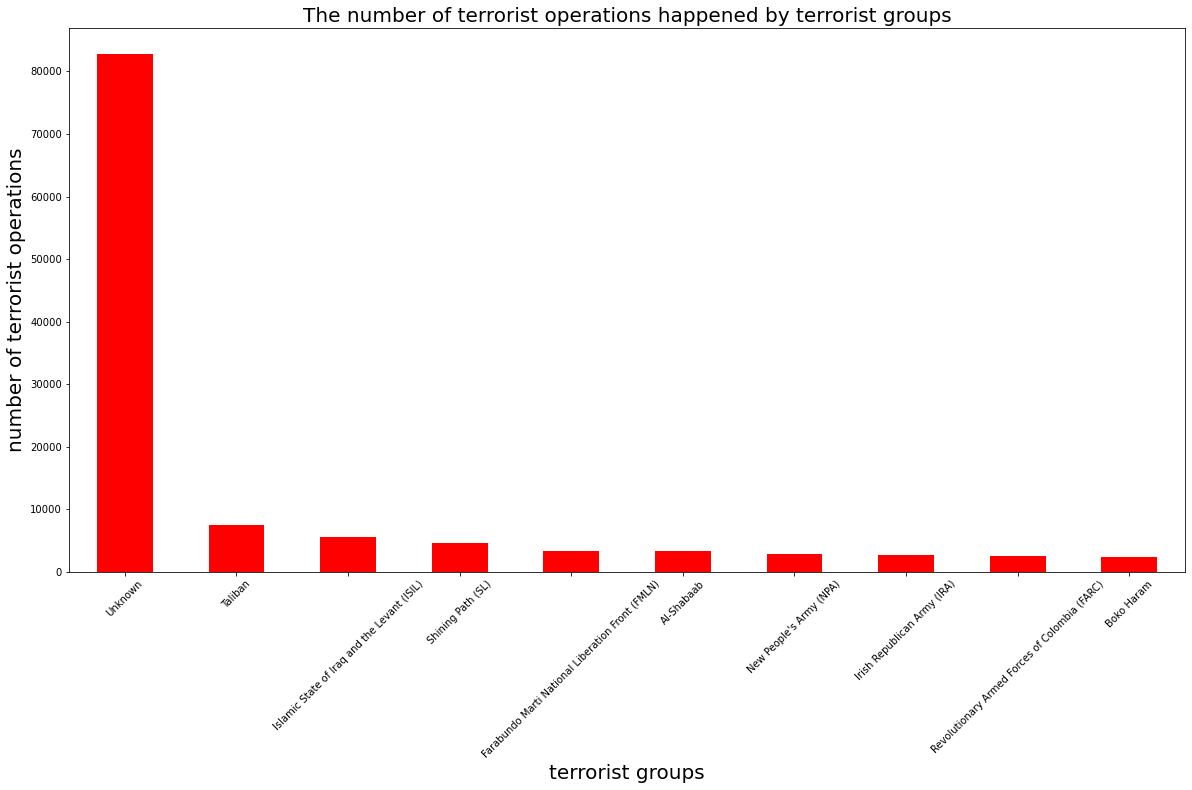

In [34]:
plt.figure(figsize=(20,10))
plt.title("The number of terrorist operations happened by terrorist groups",fontsize=20)
plt.xlabel('terrorist groups',fontsize=20)
plt.ylabel('number of terrorist operations',fontsize=20)
df['Group'].value_counts().head(10).plot(kind='bar',color='r')
plt.xticks(rotation = 45)
plt.show()

In [35]:
df.Group.value_counts()[1:10]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

In [36]:
data=df[['Group','Country','City','kill']]
data=data.groupby(['Group','Country','City'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
data

,Group,Country,City,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,Mosul,4936
1,Islamic State of Iraq and the Levant (ISIL),Iraq,Baghdad,3328
2,Al-Shabaab,Somalia,Mogadishu,3067
3,Al-Qaida,United States,New York City,2767
4,Boko Haram,Nigeria,Maiduguri,2193
5,Islamic State of Iraq and the Levant (ISIL),Iraq,Tikrit,1932
6,Al-Qaida in Iraq,Iraq,Baghdad,1863
7,Taliban,Afghanistan,Unknown,1350
8,Islamic State of Iraq and the Levant (ISIL),Iraq,Ramadi,1319
9,Farabundo Marti National Liberation Front (FMLN),El Salvador,Unknown,1253


In [37]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,40122,50,11114,2,3077,2,650,37,29,40,264,1,46,1296,76,16,95,3,0,11,106,85,15,235,0,32,140,4229,567,2387,367,2036,1131,1054,1020,15614,1,43,248,8,47,6,27,4331,9,278,5,36,30,9,80,3935,14815,2,48,3,1785,2,8,11,892,5,0,6,13,278,84,19,349,9,28,5823,215,17,41,336,367,4,6,0,19781,1252,1,1879,80039,133,2011,628,276,42,124,141,39,1982,93,67,12,29,2,4473,48,181,3108,1,0,3,55,31,33,166,22,1498,5,8,45,0,818,13,1,294,2743,1324,240,2009,45,35,0,1,11694,1480,23266,3,3,79,24320,44,85,63,17,14049,9987,11,64,7,184,245,4,4358,3238,694,331,3,3,0,852,5,7,1,4,11659,2828,16,2688,81,0,98,1874,15632,0,2,4205,29,8,24,96,15769,60,307,79,2768,76,10,351,7152,3,3087,2459,127,3750,3917,14,68,0,0,251,1,0,1670,291,3,9304,135,324,74,164


# Conclusion and Results :

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa

Year with the most attacks: 2014

Month with the most attacks: 5

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion

### Some Analysis for Egypt Terrorism Attacks

In [41]:
egypt_df = df[df['Country']== 'Egypt']
egypt_df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,Group,Targettype,Weapon
133,1970,3,14,Egypt,Alexandria,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0,2,United Arab Airlines Flight Antonov 24 Acft,Unknown,Airports & Aircraft,Explosives
1092,1971,11,28,Egypt,Cairo,Middle East & North Africa,Cairo,30.084629,31.334314,Assassination,1,0,"Jordanian Prime Minister, Wasfi Tal",Black September,Government (General),Firearms
1181,1972,2,19,Egypt,Cairo,Middle East & North Africa,Cairo,30.084629,31.334314,Hijacking,0,0,Caravelle,Jordanian National Liberation Movement,Airports & Aircraft,Explosives
5603,1977,12,5,Egypt,Cairo,Middle East & North Africa,Cairo,30.084629,31.334314,Assassination,1,0,"David Holden, Chief of Foreign Correspondents",Unknown,Journalists & Media,Firearms
6797,1978,9,30,Egypt,North Sinai,Middle East & North Africa,Yamit,31.275278,34.167778,Bombing/Explosion,0,0,beach at yamit,Palestinians,Private Citizens & Property,Explosives


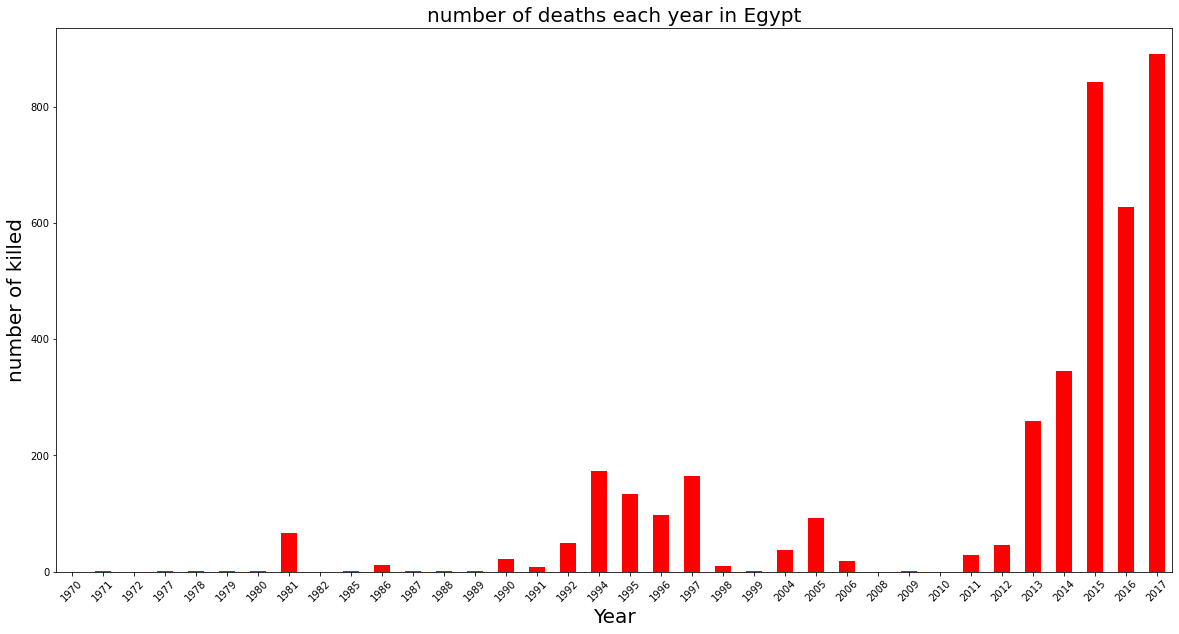

In [43]:
plt.figure(figsize=(20,10))
plt.title("number of deaths each year in Egypt", fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('number of killed', fontsize=20)
egypt_df.groupby('Year').sum()['kill'].plot(kind='bar',color='r')
plt.xticks(rotation = 45)
plt.show()

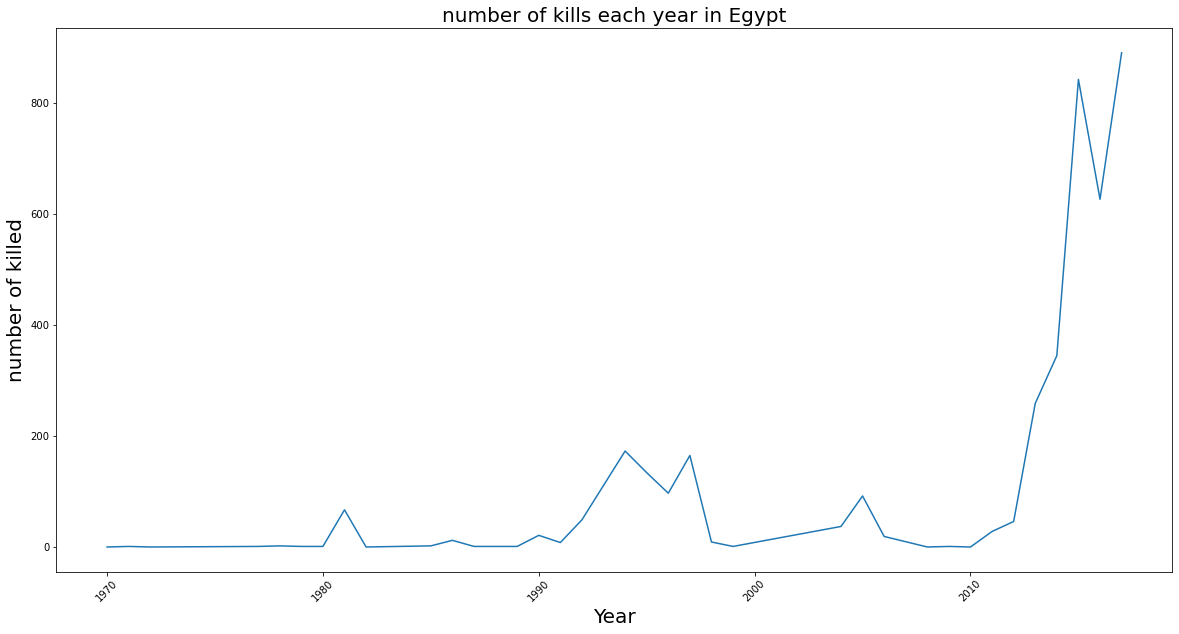

In [48]:
plt.figure(figsize=(20,10))
plt.title("number of kills each year in Egypt", fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('number of killed', fontsize=20)
egypt_df.groupby('Year').sum()['kill'].plot()
plt.xticks(rotation = 45)
plt.show()

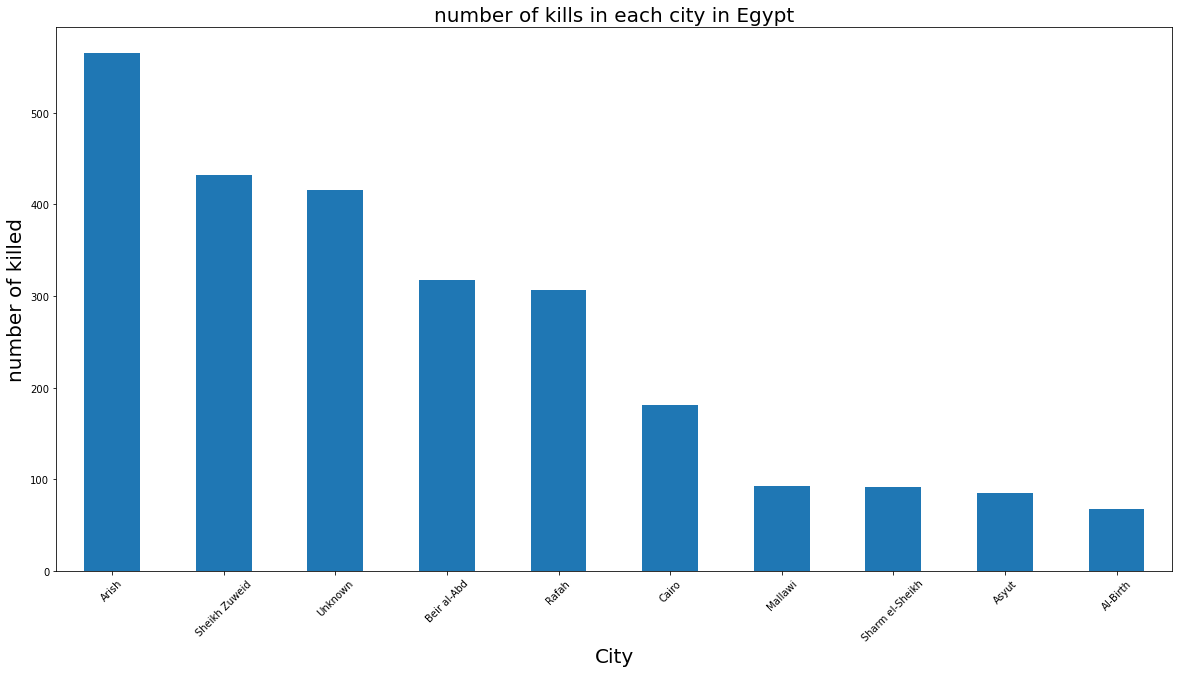

In [49]:
plt.figure(figsize=(20,10))
plt.title("number of kills in each city in Egypt", fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('number of killed', fontsize=20)
egypt_df.groupby('City').sum()['kill'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

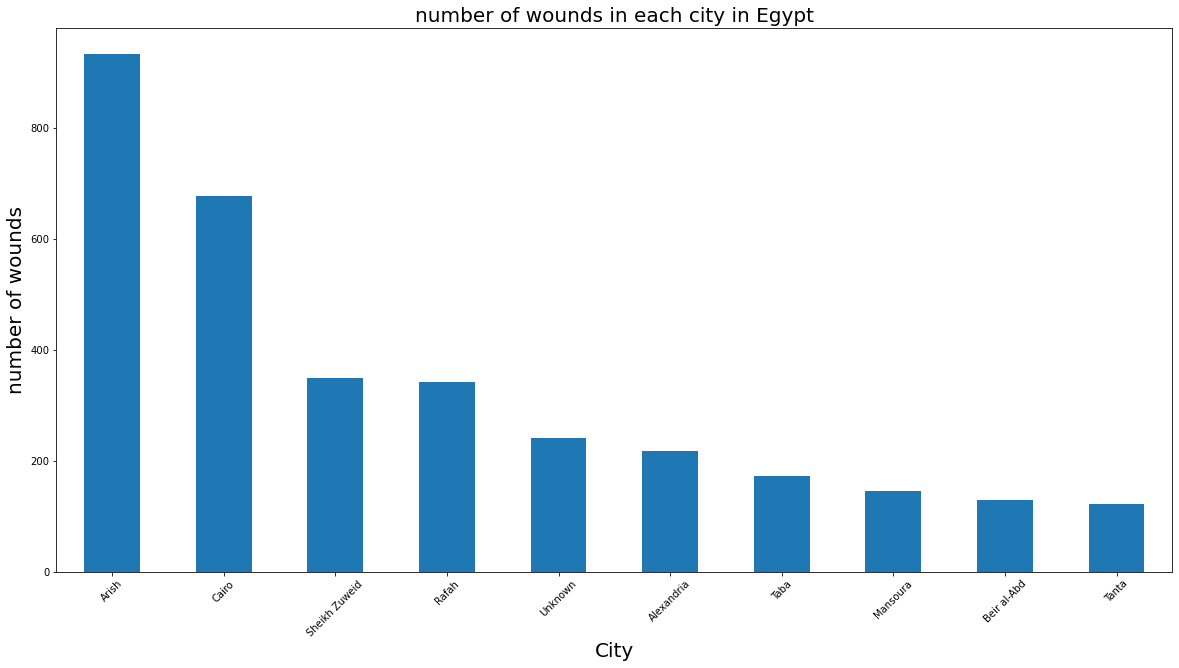

In [51]:
plt.figure(figsize=(20,10))
plt.title("number of wounds in each city in Egypt", fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('number of wounds', fontsize=20)
egypt_df.groupby('City').sum()['Wound'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

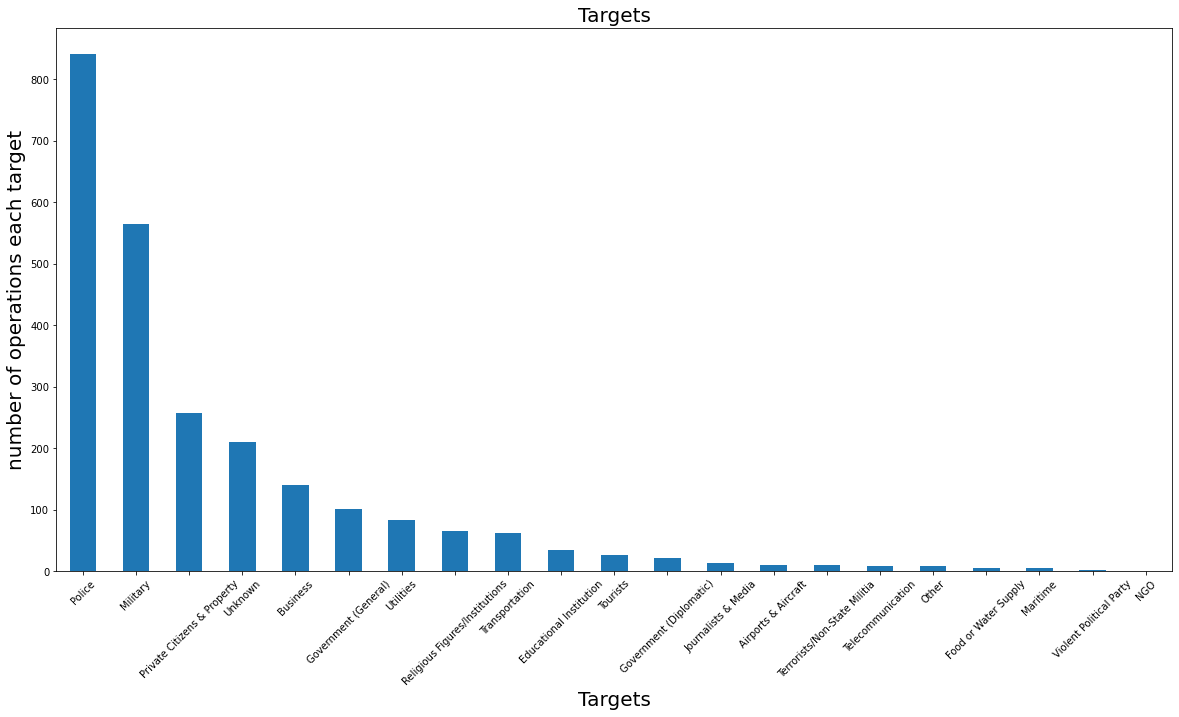

In [53]:
plt.figure(figsize=(20,10))
plt.title("Targets", fontsize=20)
plt.xlabel('Targets', fontsize=20)
plt.ylabel('number of operations each target', fontsize=20)
egypt_df['Targettype'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

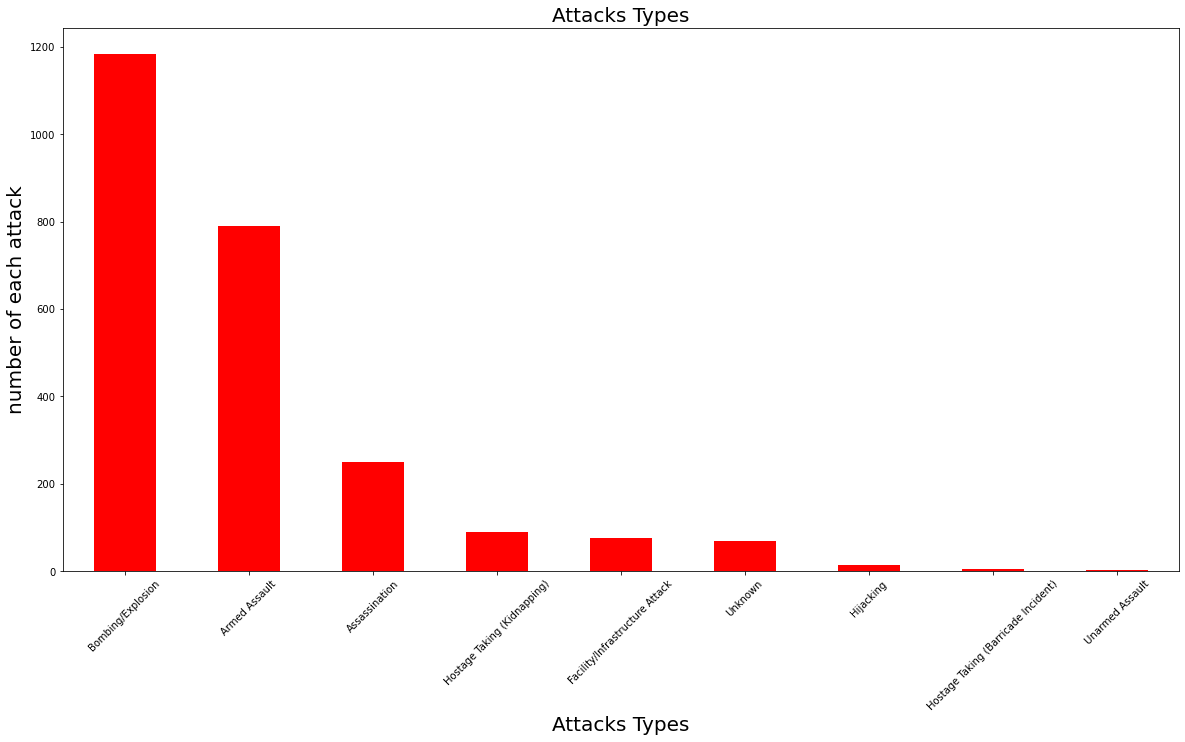

In [55]:
plt.figure(figsize=(20,10))
plt.title("Attacks Types",fontsize=20)
plt.xlabel('Attacks Types',fontsize=20)
plt.ylabel('number of each attack', fontsize=20)
egypt_df['Attacktype'].value_counts().plot(kind='bar',color='r')
plt.xticks(rotation = 45)
plt.show()